<a href="https://colab.research.google.com/github/owend23/ML/blob/main/cyber_security_cookbook_ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Train-Test Splitting Your Data/north_korea_missile_test_database.csv')
y = df['Missile Name']
X = df.drop("Missile Name", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=31
)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

81
81
27
27
27
27


# 2. Standardize Data
* To standardize a feature means to shift all of its values so that their mean = 0 and to scale them so that their variance = 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Standardizing Your Data/file_pe_headers.csv')
X = data.drop(["Name","Malware"], axis=1).to_numpy()

X_standardized = StandardScaler().fit_transform(X)


# 3. Summarizing large data using principal component analysis
* dimensionality reduction with PCA to narrow down dataset to cut out the noise that doesnt contribute to the prediction for the ML algorithm

* the transformed data indicates how much of the variance is accounted for in each direction. The sum is 1 indicating that all the variance is accounted for if we consider the full space in which the data lives

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Summarizing Large Data using Principal Component Analysis (PCA)/file_pe_headers.csv')
X = data.drop(["Name", "Malware"], axis=1).to_numpy()

X_standardized = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit_transform(X_standardized)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[0:40]))

[1.13714096e-01 6.04526312e-02 5.35847638e-02 4.95286930e-02
 4.08242868e-02 3.43687925e-02 3.32004002e-02 3.01112226e-02
 2.86901095e-02 2.81624164e-02 2.54807940e-02 2.38845548e-02
 2.22696648e-02 2.05755591e-02 1.82485433e-02 1.73648310e-02
 1.66649078e-02 1.63647194e-02 1.52683994e-02 1.46357930e-02
 1.45790542e-02 1.45535760e-02 1.44699413e-02 1.44154480e-02
 1.42948516e-02 1.39221004e-02 1.35338124e-02 1.33766277e-02
 1.32896667e-02 1.23472302e-02 1.20507834e-02 1.15452214e-02
 1.13731313e-02 1.10939084e-02 1.07062189e-02 1.01649154e-02
 9.90148375e-03 9.61478385e-03 9.17627698e-03 9.04802544e-03
 8.66332999e-03 6.94752252e-03 6.84216033e-03 6.48244001e-03
 5.95005317e-03 5.91335216e-03 5.41615029e-03 5.10640740e-03
 4.83543074e-03 4.45888820e-03 4.29104432e-03 3.82076025e-03
 3.79864324e-03 3.24146447e-03 3.18558571e-03 2.67004617e-03
 2.03201471e-03 1.73591476e-03 1.65758475e-03 1.56708821e-03
 1.38839592e-03 1.20694096e-03 8.20896559e-04 6.92520065e-04
 2.79632267e-04 1.366147

# Generating text using Markov chains

* To know the probability distribution of where the system will be next, it suffices to know where it currently is. This is in contrast with a system in which the probability distribution of the subsequent state may depend on the past history of the system

In [ ]:
import markovify
import pandas as pd
from itertools import chain

df = pd.read_csv('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Generating Text using Markov Chains/airport_reviews.csv')

N = 100
review_subset = df["content"][0:N]
text = "".join(chain.from_iterable(review_subset))
markov_chain_model = markovify.Text(text)

for i in range(3):
  print(markov_chain_model.make_short_sentence(140))

Got to the airport is not the best small airports in one.
There are many toilets they are easy to get file our lost luggage claim area.
Seems that I missed that flight and the UK to Oslo via Brussels Airport every time with rude and arrogant.


# Clustering

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Performing Clustering using Scikit-Learn/file_pe_headers.csv', sep=",")

fig = px.scatter_3d(
    df,
    x="SuspiciousImportFunctions",
    y="SectionsLength",
    z="SuspiciousNameSection",
    color="Malware",
)
fig.show()

In [ ]:
from sklearn.cluster import KMeans

y = df["Malware"]
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

estimator = KMeans(n_clusters=len(set(y)))
estimator.fit(X)

y_pred = estimator.predict(X)
df["pred"] = y_pred
df["pred"] = df["pred"].astype("category")

fig = px.scatter_3d(
    df,
    x="SuspiciousImportFunctions",
    y="SectionsLength",
    z="SuspiciousNameSection",
    color="pred",
)
fig.show()

# XGBoost Classifier

* widely considered the most reliable and accurate algorithm for generic machine learning problems.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

df = pd.read_csv("/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Training an XGBoost Classifier/file_pe_headers.csv", sep=",")
y = df["Malware"]
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train, y_train)

y_test_pred = XGB_model_instance.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}".format(accuracy * 100))


Accuracy: 98.95


# Analyzing time series using statsmodels

* A time series is a series of values obtained at successive times.

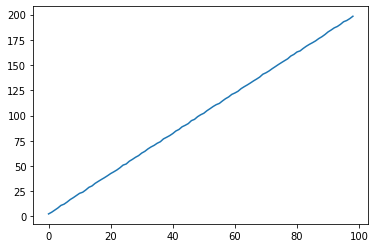

In [ ]:
from random import random

time_series = [2 * x + random() for x in range(1, 100)]

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

In [ ]:
# Autoregression (AR)
from statsmodels.tsa.ar_model import AR

model = AR(time_series)
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))

array([200.1556855])

In [ ]:
# Moving average (MA)
from statsmodels.tsa.arima_model import ARMA

model = ARMA(time_series, order=(0, 1))
model_fit = model.fit(disp=False)
y = model_fit.predict(len(time_series), len(time_series))
model_fit.params

array([100.52335294,   0.99995525])

In [ ]:
# Simple expnential smoothing (SES)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(time_series)
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))
y

array([198.3998637])

# Anomaly detection with Isolation Forest

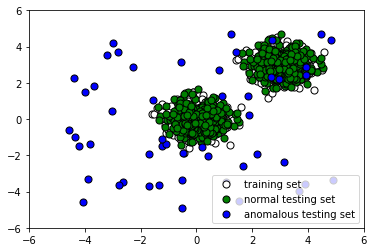

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

random_seed = np.random.RandomState(12)

X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x","y"])

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50,
                 edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, 
                 edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50,
                 edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()


In [ ]:
X_train

array([[ 2.36492916e-01, -3.40712940e-01],
       [ 1.21219748e-01, -8.50367817e-01],
       [ 3.76571417e-01, -7.67360670e-01],
       [ 2.56353907e-03, -6.01138351e-02],
       [-4.03490939e-01,  1.43590970e+00],
       [-2.98911460e-01,  2.36228497e-01],
       [ 5.47978059e-01, -6.07584401e-01],
       [ 6.71178186e-01, -6.10748938e-02],
       [ 5.06257738e-01, -4.56934573e-01],
       [-5.14765104e-01,  6.04898225e-01],
       [ 2.50936152e-01,  6.94230886e-02],
       [ 3.20380557e-01,  2.63666333e-01],
       [-5.77180118e-01, -1.10666674e+00],
       [-8.40878255e-01, -8.94047126e-01],
       [-1.10926747e+00, -3.23715390e-01],
       [-2.64202160e-01, -1.96045874e-02],
       [ 1.07487974e-01, -1.92179401e-01],
       [-1.26952039e-01,  3.66260373e-02],
       [-4.98601919e-01, -3.56928144e-01],
       [ 1.77081731e-02, -3.38972683e-01],
       [-2.85940531e-01, -5.29311577e-02],
       [ 6.67915669e-01,  1.59332644e-01],
       [-1.68797625e-01, -2.92634139e-01],
       [-5.

# Natural language processing using a hashing vectorizer and tf-idf with scikit-learn

* A hashing vectorizer is a variation on the count vectorizer that sets out to be faster and more scalable, at the cost of interpretability and hasing collisions.
* tf-idf: Term-Frequency-Inverse-Document-Frequency. The main idea is that we account for the number of times a term occurs, but discount it by the number of documents it occurs in.

In [1]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer

with open('/content/Machine-Learning-for-Cybersecurity-Cookbook/Chapter01/Natural Language Processing (NLP) using Hashing Vectorizer and Tf-Idf with Scikit-Learn/anonops_short.txt', encoding="utf8") as f:
  anonops_chat_logs = f.readlines()

In [2]:
my_vector = HashingVectorizer(input="content", ngram_range=(1, 2))
X_train_counts = my_vector.fit_transform(anonops_chat_logs,)
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [3]:
print(X_train_tf)

  (0, 938273)	0.10023429482560929
  (0, 871172)	-0.33044470291777067
  (0, 755834)	-0.2806123960092745
  (0, 556974)	-0.2171490773135763
  (0, 548264)	-0.09851435603064428
  (0, 531189)	-0.2566310842337745
  (0, 522961)	-0.3119912982467716
  (0, 514190)	-0.2527659565181208
  (0, 501800)	-0.33044470291777067
  (0, 499727)	-0.18952297847436425
  (0, 488876)	0.13502094828386488
  (0, 377854)	0.22710724511856722
  (0, 334594)	-0.25581186158424035
  (0, 256577)	0.20949022238574433
  (0, 197273)	-0.30119674850360456
  (0, 114899)	0.09713499033205285
  (0, 28523)	-0.3060506288368513
  (1, 960098)	0.09780838928665199
  (1, 955748)	-0.2747271490090429
  (1, 952302)	0.26070217969901804
  (1, 938273)	0.12095603891963835
  (1, 937092)	-0.2947114257264502
  (1, 927866)	0.21727726371674563
  (1, 820768)	-0.11065660403137358
  (1, 772066)	-0.14344517367198276
  :	:
  (180828, 329790)	0.06808618130417012
  (180828, 312887)	-0.08249409552977467
  (180828, 209871)	0.17685927011939476
  (180828, 193711)	

# Hyperparameter tuning with scikit-optimize

In [41]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target

n_iterations = 50

estimator = xgb.XGBClassifier(
    n_jobs=-1,
    objective="multi:softmax",
    eval_metric="merror",
    verbosity=0,
    num_class=len(set(y))
)

In [59]:
search_space = {
  "learning_rate": (0.01, 1.0, "log-uniform"),
  #"min_child_weight": (0, 10),
  "max_depth": Integer(1, 50, 'uniform'),
  "max_delta_step": Integer(0, 10, 'uniform'),
  "subsample": (0.01, 1.0, "uniform"),
  "colsample_bytree": (0.01, 1.0, "log-uniform"),
  "colsample_bylevel": (0.01, 1.0, "log-uniform"),
  "reg_lambda": (1e-9, 1000, "log-uniform"),
  "reg_alpha": (1e-9, 1.0, "log-uniform"),
  "gamma": (1e-9, 0.5, "log-uniform"),
  "min_child_weight": (0, 5),
  "n_estimators": (5, 5000),
  "scale_pos_weight": (1e-6, 500, "log-uniform"),
}

In [60]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [61]:
bayes_cv_tuner = BayesSearchCV(
estimator=estimator,
search_spaces=search_space,
scoring="accuracy",
cv=cv,
n_jobs=-1,
n_iter=n_iterations,
verbose=0,
refit=True,
)
dir(bayes_cv_tuner)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_search_space',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_make_optimizer',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 '_step',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'iid',
 'inverse_transform',
 'n_iter',
 'n_jobs',
 'n_points',
 'optimizer_kwargs',
 'optimizer_results_',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'refit',
 'return_train_score',
